In [1]:
#importing the basic library for EDA

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
#Reading the processed Adult data file where only ategorical variable not encoded

df = pd.read_csv('https://raw.githubusercontent.com/ayan3b/DATASET/main/ADULT/Adult_without_encoder_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        32537 non-null  int64  
 1   age               32537 non-null  int64  
 2   workclass         32537 non-null  object 
 3   fnlwgt            32537 non-null  int64  
 4   education         32537 non-null  object 
 5   education-num     32537 non-null  int64  
 6   marital-status    32537 non-null  object 
 7   occupation        32537 non-null  object 
 8   relationship      32537 non-null  object 
 9   race              32537 non-null  object 
 10  sex               32537 non-null  object 
 11  capital-gain      32537 non-null  int64  
 12  capital-loss      32537 non-null  int64  
 13  hours-per-week    32537 non-null  int64  
 14  native-country    32537 non-null  object 
 15  income            32537 non-null  object 
 16  income_binary     32537 non-null  int64 

In [4]:
df.head()


,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,hours-per-week,native-country,income,income_binary,age_s,fnlwgt_s,education_num_s,capital_gain_s,capital_loss_s,hours_per_week_s
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,...,40,United-States,<=50K,0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,...,13,United-States,<=50K,0,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,...,40,United-States,<=50K,0,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,3,53,Private,234721,HS-grad,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,40,United-States,<=50K,0,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,...,40,Cuba,<=50K,0,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664


In [5]:
# Checking the null value presence
df.isnull().sum()

Unnamed: 0          0
age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
income_binary       0
age_s               0
fnlwgt_s            0
education_num_s     0
capital_gain_s      0
capital_loss_s      0
hours_per_week_s    0
dtype: int64

In [6]:
# Ordinal encoding o education object
def education_ordinal_encoding(val):
  if val == 'Preschool':
    return 1
  elif val == 'School':
    return 2
  elif val == 'HS-grad':
    return 3
  elif val == 'AssociateLevel':
    return 4
  elif val == 'Bachelors':
    return 5
  elif val == 'Masters':
    return 6
  elif val == 'Prof-school':
    return 7
  elif val == 'Doctorate':
    return 8
  else :
    return 0

In [7]:
df['education_e'] = df.education.apply(lambda x : education_ordinal_encoding(x))

df[['education','education_e']].head()

,education,education_e
0,Bachelors,5
1,Bachelors,5
2,HS-grad,3
3,HS-grad,3
4,Bachelors,5


## encoding on the other categorical attributes label encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# Selecting the columns to be one-hot encoded
columns_to_encode = ['workclass', 'occupation','relationship','marital-status','race','sex']

# Creating a DataFrame with only the selected columns
df_categorical = df[columns_to_encode]

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()


# Creating a DataFrame from the encoded columns
for col in columns_to_encode:
    column_name = col + "_e"
    df_categorical[column_name] = label_encoder.fit_transform(df_categorical[col])


# Concatenating the encoded DataFrame with the original DataFrame, dropping the original categorical columns
# Now df_encoded contains the label-encoded categorical variables
# Keeping only encoded columns
df_categorical = df_categorical.drop(columns=columns_to_encode)
df_encoded_for_xgboost = pd.concat([df, df_categorical], axis=1)

# Display the updated DataFrame
df_encoded_for_xgboost.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,capital_gain_s,capital_loss_s,hours_per_week_s,education_e,workclass_e,occupation_e,relationship_e,marital-status_e,race_e,sex_e
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,...,0.148292,-0.216743,-0.035664,5,6,0,1,4,2,1
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,...,-0.145975,-0.216743,-2.222483,5,5,3,0,2,2,1
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,...,-0.145975,-0.216743,-0.035664,3,3,5,1,0,2,1
3,3,53,Private,234721,HS-grad,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,-0.145975,-0.216743,-0.035664,3,3,5,0,2,0,1
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,...,-0.145975,-0.216743,-0.035664,5,3,9,5,2,0,0


In [21]:
df_encoded_for_xgboost.groupby(['sex_e']).agg({'income' : 'count'})


,income
sex_e,
0,10762
1,21775


In [12]:
df_encoded_for_xgboost.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,income_binary,age_s,fnlwgt_s,education_num_s,capital_gain_s,capital_loss_s,hours_per_week_s,education_e,race_e,sex_e
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,...,0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664,5,2,1
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,...,0,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483,5,2,1
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,...,0,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664,3,2,1
3,3,53,Private,234721,HS-grad,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,0,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664,3,0,1
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,...,0,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664,5,0,0


In [26]:
df_encoded_for_xgboost.isnull().sum()

Unnamed: 0          0
age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
income_binary       0
age_s               0
fnlwgt_s            0
education_num_s     0
capital_gain_s      0
capital_loss_s      0
hours_per_week_s    0
education_e         0
workclass_e         0
occupation_e        0
relationship_e      0
marital-status_e    0
race_e              0
sex_e               0
dtype: int64

In [22]:
df_encoded_for_xgboost.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'income_binary', 'age_s', 'fnlwgt_s',
       'education_num_s', 'capital_gain_s', 'capital_loss_s',
       'hours_per_week_s', 'education_e', 'workclass_e', 'occupation_e',
       'relationship_e', 'marital-status_e', 'race_e', 'sex_e'],
      dtype='object')

In [23]:
list_of_x_column = ['age_s', 'fnlwgt_s',
       'education_num_s', 'capital_gain_s', 'capital_loss_s',
       'hours_per_week_s', 'education_e', 'workclass_e', 'occupation_e',
       'relationship_e', 'marital-status_e', 'race_e', 'sex_e']

In [24]:
y_column = ['income', 'income_binary']

##  XGBOOST Model Build

In [50]:
# target variable and input features has been splited into two different dataframe

col_list = ['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'age_s', 'fnlwgt_s',
       'education_num_s', 'capital_gain_s', 'capital_loss_s',
       'hours_per_week_s', 'education_e', 'workclass_e', 'occupation_e',
       'relationship_e', 'marital-status_e', 'race_e', 'sex_e']

X = df_encoded_for_xgboost[col_list]
y = df_encoded_for_xgboost['income_binary']

In [51]:
# Traiin test split of dataframe

from sklearn.model_selection import train_test_split

# Splitting data into train and test set 70:30
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [54]:
# Putting feature variables into X
X_train = X_train_split[list_of_x_column]
print("the shape of X_train datafrae :",X_train.shape)

X_test = X_test_split[list_of_x_column]
print("the shape of X_test datafrae :",X_test.shape)

# Putting target variable to y
y_train = y_train_split
print("the shape of y_train datafrae :",y_train.shape)

y_test = y_test_split
print("the shape of y_test datafrae :",y_test.shape)

the shape of X_train datafrae : (22775, 13)
the shape of X_test datafrae : (9762, 13)
the shape of y_train datafrae : (22775,)
the shape of y_test datafrae : (9762,)


In [55]:
# Importing XGBoost
from xgboost import XGBClassifier

# Importing libraries for cross validation- Hyperparameter Tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [56]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.4, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=4, n_estimators=150)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=150,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.4, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [57]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.250756,0.005775,0.022678,0.000298,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.921217,0.922368,0.925584,0.923056,0.001848,5,0.939128,0.938589,0.937320,0.938345,0.000758
1,0.251026,0.012532,0.022225,0.000171,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.923433,0.926097,0.927176,0.925569,0.001573,3,0.942840,0.941540,0.940202,0.941527,0.001077
2,0.235888,0.005975,0.023342,0.001522,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.924849,0.927084,0.928445,0.926793,0.001482,1,0.942662,0.942213,0.941071,0.941982,0.000670
3,0.241399,0.007929,0.022198,0.000071,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.918267,0.919386,0.921115,0.919589,0.001171,7,0.947734,0.946619,0.946473,0.946942,0.000563
4,0.232587,0.003254,0.027909,0.008094,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.921136,0.923168,0.926164,0.923489,0.002065,4,0.953835,0.951689,0.951150,0.952225,0.001160
5,0.225326,0.010504,0.022276,0.000524,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.924525,0.926064,0.927889,0.926159,0.001375,2,0.954784,0.953309,0.952502,0.953532,0.000945
6,0.230951,0.004441,0.028301,0.006974,0.4,0.3,"{'learning_rate': 0.4, 'subsample': 0.3}",0.904991,0.904589,0.911825,0.907135,0.003320,10,0.951765,0.950704,0.950986,0.951152,0.000449
7,0.228546,0.002003,0.022678,0.001340,0.4,0.6,"{'learning_rate': 0.4, 'subsample': 0.6}",0.912406,0.915055,0.919468,0.915643,0.002913,8,0.964585,0.962101,0.962474,0.963053,0.001094
8,0.449272,0.314348,0.026984,0.007713,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",0.918838,0.920560,0.924252,0.921217,0.002258,6,0.967199,0.966624,0.965160,0.966327,0.000858
9,0.911071,0.716025,0.038366,0.013794,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.888234,0.896535,0.896974,0.893915,0.004021,12,0.949726,0.950346,0.947931,0.949334,0.001024


In [58]:
model_cv.best_params_

{'learning_rate': 0.1, 'subsample': 0.9}

In [59]:
params = {'learning_rate': 0.1,
          'max_depth': 4,
          'n_estimators':150,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_lbl_encoder_model = XGBClassifier(params = params)
xgb_lbl_encoder_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [60]:
# Predictions on the train set
y_train_pred = xgb_lbl_encoder_model.predict(X_train)

In [61]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16605   688]
 [ 1345  4137]]


In [62]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [63]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.910735455543359
Sensitivity:- 0.7546515870120394
Specificity:- 0.960215115942867
F1-Score:- 0.802755408945377


In [64]:
# Predicted probability
y_train_pred_proba_xgb_lbl_encoder = xgb_lbl_encoder_model.predict_proba(X_train)[:,1]

In [65]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_xgb_lbl_encoder)
auc

0.9659202816668391

In [66]:
# ROC Curve function
import matplotlib.pyplot as plt

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

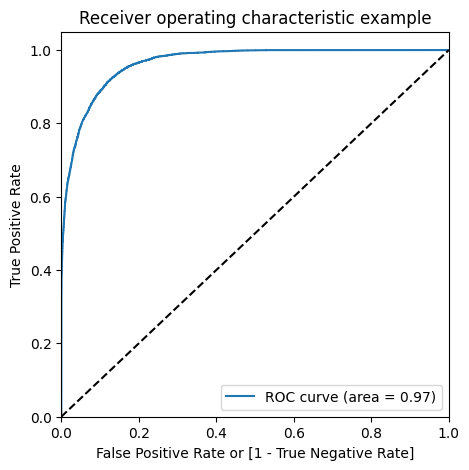

In [67]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_xgb_lbl_encoder)

## Need to check along with accuracy what is fairness KPI says

In [68]:
# Predictions on the train set
y_test_pred = xgb_lbl_encoder_model.predict(X_test)

In [70]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6910  495]
 [ 817 1540]]


In [71]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [72]:
# Accuracy on the test dataset
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.8656013112067199
Sensitivity:- 0.6533729316928298
Specificity:- 0.9331532748143146
F1-Score:- 0.7012750455373405


training data have F1 score 80% but on the test data F1 score dropped to 70%

In [103]:
df_measure_fair = pd.concat([X_test_split, y_test], axis=1)

df_measure_fair = df_measure_fair.reset_index(drop=True)
df_measure_fair.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,capital_loss_s,hours_per_week_s,education_e,workclass_e,occupation_e,relationship_e,marital-status_e,race_e,sex_e,income_binary
0,3643,31,State-gov,33308,AssociateLevel,11,Married-civ-spouse,Craft-repair,Husband,White,...,-0.216743,-0.035664,4,6,2,0,2,2,1,0
1,16042,24,Federal-gov,130534,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,-0.216743,-0.035664,5,0,3,1,4,2,1,0
2,9404,60,Local-gov,98350,Bachelors,10,Married-civ-spouse,Other-service,Husband,Other,...,-0.216743,1.584202,5,1,7,0,2,1,1,0
3,17910,31,Private,398988,Bachelors,10,Never-married,Exec-managerial,Not-in-family,White,...,-0.216743,-0.035664,5,3,3,1,4,2,1,0
4,5200,43,Federal-gov,144778,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,-0.216743,-0.035664,5,0,3,1,4,2,1,1


In [104]:
y_test_pred.shape

(9762,)

In [105]:
y_test_pred[0:10,]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [106]:
#convertin numpy array to dataframe
data = y_test_pred
df_y_test_pred = pd.DataFrame(data = data[0:,],
                              index=[i for i in range(data.shape[0])],
                              columns = ['income_binary_pred']
                              )
df_y_test_pred.head(10)

,income_binary_pred
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [107]:
df_measure_fair = pd.concat([df_measure_fair, df_y_test_pred], axis=1)

df_measure_fair.head(10)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,hours_per_week_s,education_e,workclass_e,occupation_e,relationship_e,marital-status_e,race_e,sex_e,income_binary,income_binary_pred
0,3643,31,State-gov,33308,AssociateLevel,11,Married-civ-spouse,Craft-repair,Husband,White,...,-0.035664,4,6,2,0,2,2,1,0,0
1,16042,24,Federal-gov,130534,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,-0.035664,5,0,3,1,4,2,1,0,0
2,9404,60,Local-gov,98350,Bachelors,10,Married-civ-spouse,Other-service,Husband,Other,...,1.584202,5,1,7,0,2,1,1,0,0
3,17910,31,Private,398988,Bachelors,10,Never-married,Exec-managerial,Not-in-family,White,...,-0.035664,5,3,3,1,4,2,1,0,0
4,5200,43,Federal-gov,144778,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,-0.035664,5,0,3,1,4,2,1,1,0
5,28785,50,Private,150975,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,Other,...,-0.035664,3,3,6,1,0,1,0,0,0
6,4638,66,State-gov,41506,School,6,Divorced,Other-service,Not-in-family,Black,...,-0.035664,2,6,7,1,0,0,0,0,0
7,1487,25,Private,174592,HS-grad,9,Never-married,Other-service,Own-child,White,...,-1.250563,3,3,7,3,4,2,0,0,0
8,20382,58,Private,354024,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,...,-0.035664,3,3,0,5,2,2,0,1,1
9,9814,45,Private,188950,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,...,0.774269,6,3,3,0,2,2,1,1,1


In [108]:
# replacing the column name
df_measure_fair.columns = df_measure_fair.columns.str.replace('Unnamed: 0', 'Original_rownum')

In [110]:
df_measure_fair.columns

Index(['Original_rownum', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'age_s', 'fnlwgt_s', 'education_num_s',
       'capital_gain_s', 'capital_loss_s', 'hours_per_week_s', 'education_e',
       'workclass_e', 'occupation_e', 'relationship_e', 'marital-status_e',
       'race_e', 'sex_e', 'income_binary', 'income_binary_pred'],
      dtype='object')

In [113]:
col_list = ['Original_rownum','race','sex','income','income_binary','income_binary_pred']
df_m_f = df_measure_fair[col_list]

def check_rediction_result(val1,val2):
  if val1 == val2:
    return 'R'
  else :
    return 'W'



In [115]:
df_m_f.head()

,Original_rownum,race,sex,income,income_binary,income_binary_pred
0,3643,White,Male,<=50K,0,0
1,16042,White,Male,<=50K,0,0
2,9404,Other,Male,<=50K,0,0
3,17910,White,Male,<=50K,0,0
4,5200,White,Male,>50K,1,0


In [119]:
df_m_f.isnull().sum()

Original_rownum       0
race                  0
sex                   0
income                0
income_binary         0
income_binary_pred    0
dtype: int64

In [120]:
df_m_f.groupby(['race','sex']).agg({'Original_rownum': 'count'})

Original_rownum
race  sex                    
Black Female              482
      Male                456
Other Female              161
      Male                302
White Female             2544
      Male               5817

## Intersectional Sufficiency Metric

Identify the relevant demographic attributes (e.g., race, gender)

Measure the classification accuracy separately for each intersectional group by comparing the predicted and actual labels.

Develop a metric that combines accuracy across all groups, considering both overall accuracy and accuracy within each intersectional subgroup.

Utilize Python and relevant libraries (e.g., scikit-learn) to implement the calculation of Intersectional Sufficiency based on the defined metric.


In [121]:
from sklearn.metrics import accuracy_score

def calculate_intersectional_sufficiency(df, intersectional_groups):
    intersectional_sufficiency_scores = []

    # Iterate over each intersectional group
    for group in intersectional_groups:
        # Create a mask for the current intersectional group
        mask = (df['race'] == group[0]) & (df['sex'] == group[1])

        # Extract actual and predicted results for the current group
        actual_results = df.loc[mask, 'income_binary']
        predicted_results = df.loc[mask, 'income_binary_pred']

        # Calculate accuracy for the current group
        accuracy = accuracy_score(actual_results, predicted_results)

        # Append accuracy to the list
        intersectional_sufficiency_scores.append(accuracy)

    # Calculate the overall Intersectional Sufficiency metric
    overall_sufficiency = sum(intersectional_sufficiency_scores) / len(intersectional_sufficiency_scores)

    return overall_sufficiency

# Define your DataFrame df1
# For example:
# df1 = pd.DataFrame({'race': [...], 'sex': [...], 'actual_result': [...], 'predicted_result': [...]})

# Define the intersectional groups based on race and sex
intersectional_groups = [('Black', 'Female'), ('Black', 'Male'), ('White', 'Female'), ('White', 'Male'),('Other', 'Female'), ('Other', 'Male')]

# Calculate Intersectional Sufficiency
intersectional_sufficiency = calculate_intersectional_sufficiency(df_m_f, intersectional_groups)

print(f'Intersectional Sufficiency Metric: {intersectional_sufficiency}')

Intersectional Sufficiency Metric: 0.8944964047774854
